<a href="https://colab.research.google.com/github/rochismandatta/IBM_Capstone_Proj/blob/master/IBM_Capstone_Car_Accidents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import json

In [6]:
data = pd.read_csv('https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
data.describe()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,65070.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,1.149360e+05,194673.000000,1.946730e+05
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,37558.450576,1.298901,2.444427,0.037139,0.028391,1.920780,13.867768,7.972521e+06,269.401114,9.782452e+03
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,51745.990273,0.457778,1.345929,0.198150,0.167413,0.631047,6.868755,2.553533e+06,3315.776055,7.226926e+04
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,23807.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.007024e+06,0.000000,0.000000e+00
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,28667.000000,1.000000,2.000000,0.000000,0.000000,2.000000,11.000000,6.040015e+06,0.000000,0.000000e+00
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,29973.000000,1.000000,2.000000,0.000000,0.000000,2.000000,13.000000,8.023022e+06,0.000000,0.000000e+00
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,33973.000000,2.000000,3.000000,0.000000,0.000000,2.000000,14.000000,1.015501e+07,0.000000,0.000000e+00
max,2.000000,-122.238949,47.734142,219547.000000,331454.000000,332954.000000,757580.000000,2.000000,81.000000,6.000000,2.000000,12.000000,69.000000,1.307202e+07,525241.000000,5.239700e+06


In [8]:
data.head(10)

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE.1,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,5TH AVE NE AND NE 103RD ST,,NaN,2,Injury Collision,Angles,2,0,0,2,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Overcast,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,NaN,NaN,1,Property Damage Only Collision,Sideswipe,2,0,0,2,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),16,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",NaN,0,Raining,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,NaN,NaN,1,Property Damage Only Collision,Parked Car,4,0,0,3,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,0,Overcast,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,2ND AVE BETWEEN MARION ST AND MADISON ST,,NaN,1,Property Damage Only Collision,Other,3,0,0,3,2013/03/29 00:00:00+00,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Clear,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,SWIFT AVE S AND SWIFT AV OFF RP,NaN,NaN,2,Injury Collision,Angles,2,0,0,2,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Raining,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N
5,1,-122.387598,47.690575,6,320840,322340,E919477,Matched,Intersection,36974.0,24TH AVE NW AND NW 85TH ST,,NaN,1,Property Damage Only Collision,Angles,2,0,0,2,2019/04/20 00:00:00+00,4/20/2019 5:42:00 PM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Clear,Dry,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
6,1,-122.338485,47.618534,7,83300,83300,3282542,Matched,Intersection,29510.0,DENNY WAY AND WESTLAKE AVE,NaN,NaN,1,Property Damage Only Collision,Angles,2,0,0,2,2008/12/09 00:00:00+00,12/9/2008,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Raining,Wet,Daylight,NaN,8344002.0,NaN,10,Entering at angle,0,0,N
7,2,-122.320780,47.614076,9,330897,332397,EA30304,Matched,Intersection,29745.0,BROADWAY AND E PIKE ST,,NaN,2,Injury Collision,Cycles,3,0,1,1,2020/04/15 00:00:00+00,4/15/2020 5:47:00 PM,At Intersection (intersection related),51,PEDALCYCLIST STRUCK MOTOR VEHICLE FRONT END AT...,NaN,N,Clear,Dry,Daylight,NaN,NaN,NaN,5,Vehicle Strikes Pedalcyclist,6855,0,N
8,1,-122.335930,47.611904,10,63400,63400,2071243,Matched,Block,NaN,PINE ST BETWEEN 5TH AVE AND 6TH AVE,NaN,NaN,1,Property Damage Only Collision,Parked Car,2,0,0,2,2006/06/15 00:00:00+00,6/15/2006 1:00:00 PM,Mid-Block (not related to intersection),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Clear,Dry,Daylight,NaN,6166014.0,NaN,32,One parked--one moving,0,0,N
9,2,-122.384700,47.528475,12,58600,58600,2072105,Matched,Intersection,34679.0,41ST AVE SW AND SW THISTLE ST,NaN,NaN,2,Injury Collision,Angles,2,0,0,2,2006/03/20 00:00:00+00,3/20/2006 3:49:00 PM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK M

In [9]:
data.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [10]:
y = data['SEVERITYCODE'].values

In [11]:
data['COLLISIONTYPE'].value_counts()

Parked Car    47987
Angles        34674
Rear Ended    34090
Other         23703
Sideswipe     18609
Left Turn     13703
Pedestrian     6608
Cycles         5415
Right Turn     2956
Head On        2024
Name: COLLISIONTYPE, dtype: int64

In [72]:
X = data[['ADDRTYPE','PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT','INCDTTM','INATTENTIONIND','UNDERINFL','WEATHER','ROADCOND','LIGHTCOND','PEDROWNOTGRNT','SPEEDING','COLLISIONTYPE','HITPARKEDCAR']]
#X2 = X.copy(deep = True)

In [73]:
X['INCDTTM'] = pd.to_datetime(X['INCDTTM'], errors='coerce')
X['Year']=X['INCDTTM'].dt.year
X['Month']=X['INCDTTM'].dt.strftime('%b')
X['Day']=X['INCDTTM'].dt.day
X['Hour']=X['INCDTTM'].dt.hour
X['Weekend']=X['INCDTTM'].dt.weekday
X.drop(['INCDTTM'],axis = 1,inplace = True)
X[0:5]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,ADDRTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,COLLISIONTYPE,HITPARKEDCAR,Year,Month,Day,Hour,Weekend
0,Intersection,2,0,0,2,NaN,N,Overcast,Wet,Daylight,NaN,NaN,Angles,N,2013,Mar,27,14,2
1,Block,2,0,0,2,NaN,0,Raining,Wet,Dark - Street Lights On,NaN,NaN,Sideswipe,N,2006,Dec,20,18,2
2,Block,4,0,0,3,NaN,0,Overcast,Dry,Daylight,NaN,NaN,Parked Car,N,2004,Nov,18,10,3
3,Block,3,0,0,3,NaN,N,Clear,Dry,Daylight,NaN,NaN,Other,N,2013,Mar,29,9,4
4,Intersection,2,0,0,2,NaN,0,Raining,Wet,Daylight,NaN,NaN,Angles,N,2004,Jan,28,8,2


In [74]:
X['INATTENTIONIND'].replace('Y',1,inplace = True)
X['INATTENTIONIND'] = X['INATTENTIONIND'].fillna(0)
X['UNDERINFL'] = X['UNDERINFL'].fillna(0)
X['UNDERINFL'].replace('Y',1,inplace =True)
X['UNDERINFL'].replace('N',0,inplace =True)
X['PEDROWNOTGRNT'].replace('Y',1,inplace =True)
X['PEDROWNOTGRNT'] = X['PEDROWNOTGRNT'].fillna(0)
X['SPEEDING'].replace('Y',1,inplace =True)
X['SPEEDING'] = X['SPEEDING'].fillna(0)
X[0:5]

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexi

,ADDRTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,COLLISIONTYPE,HITPARKEDCAR,Year,Month,Day,Hour,Weekend
0,Intersection,2,0,0,2,0.0,0,Overcast,Wet,Daylight,0.0,0.0,Angles,N,2013,Mar,27,14,2
1,Block,2,0,0,2,0.0,0,Raining,Wet,Dark - Street Lights On,0.0,0.0,Sideswipe,N,2006,Dec,20,18,2
2,Block,4,0,0,3,0.0,0,Overcast,Dry,Daylight,0.0,0.0,Parked Car,N,2004,Nov,18,10,3
3,Block,3,0,0,3,0.0,0,Clear,Dry,Daylight,0.0,0.0,Other,N,2013,Mar,29,9,4
4,Intersection,2,0,0,2,0.0,0,Raining,Wet,Daylight,0.0,0.0,Angles,N,2004,Jan,28,8,2


In [75]:
print(len(X["ROADCOND"].unique()))
X["ROADCOND"].replace(X["ROADCOND"].unique(),[i for i in range(1,1+len(X["ROADCOND"].unique()))],inplace = True)
X["ROADCOND"] = X["ROADCOND"].fillna(0)
X[0:10]


10


/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,ADDRTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,COLLISIONTYPE,HITPARKEDCAR,Year,Month,Day,Hour,Weekend
0,Intersection,2,0,0,2,0.0,0,Overcast,1,Daylight,0.0,0.0,Angles,N,2013,Mar,27,14,2
1,Block,2,0,0,2,0.0,0,Raining,1,Dark - Street Lights On,0.0,0.0,Sideswipe,N,2006,Dec,20,18,2
2,Block,4,0,0,3,0.0,0,Overcast,2,Daylight,0.0,0.0,Parked Car,N,2004,Nov,18,10,3
3,Block,3,0,0,3,0.0,0,Clear,2,Daylight,0.0,0.0,Other,N,2013,Mar,29,9,4
4,Intersection,2,0,0,2,0.0,0,Raining,1,Daylight,0.0,0.0,Angles,N,2004,Jan,28,8,2
5,Intersection,2,0,0,2,0.0,0,Clear,2,Daylight,0.0,0.0,Angles,N,2019,Apr,20,17,5
6,Intersection,2,0,0,2,0.0,0,Raining,1,Daylight,0.0,0.0,Angles,N,2008,Dec,9,0,1
7,Intersection,3,0,1,1,0.0,0,Clear,2,Daylight,0.0,0.0,Cycles,N,2020,Apr,15,17,2
8,Block,2,0,0,2,0.0,0,Clear,2,Daylight,0.0,0.0,Parked Car,N,2006,Jun,15,13,3
9,Intersection,2,0,0,2,0.0,0,Clear,2,Daylight,0.0,0.0,Angles,N,2006,Mar,20,15,0


In [76]:
X["WEATHER"].replace(X["WEATHER"].unique(),[i for i in range(1,1+len(X["WEATHER"].unique()))],inplace = True)
X["WEATHER"] = X["WEATHER"].fillna(0)

X["LIGHTCOND"].replace(X["LIGHTCOND"].unique(),[i for i in range(1,1+len(X["LIGHTCOND"].unique()))],inplace = True)
X["LIGHTCOND"] = X["LIGHTCOND"].fillna(0)

X["ADDRTYPE"].replace(X["ADDRTYPE"].unique(),[i for i in range(1,1+len(X["ADDRTYPE"].unique()))],inplace = True)
X["ADDRTYPE"] = X["ADDRTYPE"].fillna(0)

X["Month"].replace(X["Month"].unique(),[i for i in range(1,1+len(X["Month"].unique()))],inplace = True)
X["Month"] = X["Month"].fillna(0)



/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexi

In [77]:
X.head()
X.COLLISIONTYPE.unique()

array(['Angles', 'Sideswipe', 'Parked Car', 'Other', 'Cycles',
       'Rear Ended', 'Head On', nan, 'Left Turn', 'Pedestrian',
       'Right Turn'], dtype=object)

In [45]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(list(X.COLLISIONTYPE.unique()))

LabelEncoder()

In [78]:
X["COLLISIONTYPE"].replace(X["COLLISIONTYPE"].unique(),[i for i in range(1,1+len(X["COLLISIONTYPE"].unique()))],inplace = True)
X["COLLISIONTYPE"] = X["COLLISIONTYPE"].fillna(0)

X["HITPARKEDCAR"].replace(X["HITPARKEDCAR"].unique(),[i for i in range(1,1+len(X["HITPARKEDCAR"].unique()))],inplace = True)
X["HITPARKEDCAR"] = X["HITPARKEDCAR"].fillna(0)

X[0:5]

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexi

,ADDRTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,COLLISIONTYPE,HITPARKEDCAR,Year,Month,Day,Hour,Weekend
0,1,2,0,0,2,0.0,0,1,1,1,0.0,0.0,1,1,2013,1,27,14,2
1,2,2,0,0,2,0.0,0,2,1,2,0.0,0.0,2,1,2006,2,20,18,2
2,2,4,0,0,3,0.0,0,1,2,1,0.0,0.0,3,1,2004,3,18,10,3
3,2,3,0,0,3,0.0,0,3,2,1,0.0,0.0,4,1,2013,1,29,9,4
4,1,2,0,0,2,0.0,0,2,1,1,0.0,0.0,1,1,2004,4,28,8,2


In [79]:
X['INATTENTIONIND'] = X['INATTENTIONIND'].astype(int)
X['SPEEDING'] = X['SPEEDING'].astype(int)
X[0:10]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ADDRTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,COLLISIONTYPE,HITPARKEDCAR,Year,Month,Day,Hour,Weekend
0,1,2,0,0,2,0,0,1,1,1,0.0,0,1,1,2013,1,27,14,2
1,2,2,0,0,2,0,0,2,1,2,0.0,0,2,1,2006,2,20,18,2
2,2,4,0,0,3,0,0,1,2,1,0.0,0,3,1,2004,3,18,10,3
3,2,3,0,0,3,0,0,3,2,1,0.0,0,4,1,2013,1,29,9,4
4,1,2,0,0,2,0,0,2,1,1,0.0,0,1,1,2004,4,28,8,2
5,1,2,0,0,2,0,0,3,2,1,0.0,0,1,1,2019,5,20,17,5
6,1,2,0,0,2,0,0,2,1,1,0.0,0,1,1,2008,2,9,0,1
7,1,3,0,1,1,0,0,3,2,1,0.0,0,5,1,2020,5,15,17,2
8,2,2,0,0,2,0,0,3,2,1,0.0,0,3,1,2006,6,15,13,3
9,1,2,0,0,2,0,0,3,2,1,0.0,0,1,1,2006,1,20,15,0


In [80]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [81]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [83]:
X = StandardScaler().fit(X).transform(X.astype(float))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
from imblearn.over_sampling import SMOTE
from imblearn import over_sampling
sm = over_sampling.SMOTE(random_state = 4,ratio = 1.0)
X_train_res,y_train_res = sm.fit_sample(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


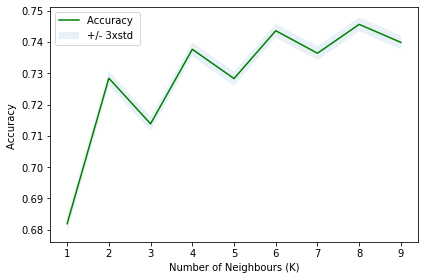

In [56]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=knn.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
    
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbours (K)')
plt.tight_layout()
plt.show()

In [57]:
knn = KNeighborsClassifier(n_neighbors = 2).fit(X_train,y_train)
print('KNN')
y_hat = knn.predict(X_test)
print("KNN Accuracy: ", metrics.accuracy_score(y_test, y_hat))
print('F1 Score')
print(f1_score(y_test, y_hat, average='weighted'))
print('Jaccard')
print(jaccard_similarity_score(y_test, y_hat))

KNN
KNN Accuracy:  0.7284191601386927
F1 Score
0.6923005957978059
Jaccard
0.7284191601386927


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [88]:

LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
y_hat =  LR.predict(X_test)
print('Logistic Regression')
print("LR Accuracy: ", metrics.accuracy_score(y_test,y_hat))
print('F1 Score')
print(f1_score(y_test, y_hat, average='weighted'))
print('Jaccard')
print(jaccard_similarity_score(y_test,y_hat))


Logistic Regression
LR Accuracy:  0.752253756260434
F1 Score
0.7083537226599758
Jaccard
0.752253756260434


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [59]:
dt = DecisionTreeClassifier(criterion="entropy")
dt.fit(X_train,y_train)
y_hat = dt.predict(X_test)
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, y_hat))
print('F1 Score')
print(f1_score(y_test, y_hat, average='weighted'))
print('Jaccard Similarity')
print(jaccard_similarity_score(y_test, y_hat))

DecisionTrees's Accuracy:  0.6826505714652626
F1 Score
0.6836593394930849
Jaccard Similarity
0.6826505714652626


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [60]:
clf = GradientBoostingClassifier(random_state=4).fit(X_train,y_train)
print('XGBoost')
y_hat = clf.predict(X_test)
print("XGBoost's Accuracy: ", metrics.accuracy_score(y_test,y_hat))
print('F1 Score')
print(f1_score(y_test,y_hat, average='weighted'))
print('Jaccard Similarity')
print(jaccard_similarity_score(y_test,y_hat))

XGBoost
XGBoost's Accuracy:  0.7629639142160011
F1 Score
0.7275912596183378
Jaccard Similarity
0.7629639142160011


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [95]:
clf = RandomForestClassifier(max_depth=10, random_state=4).fit(X_train,y_train)
print('Random Forest')
y_hat = clf.predict(X_test)
print("Random Forest's Accuracy: ", metrics.accuracy_score(y_test,y_hat ))
print('F1 Score')
print(f1_score(y_test, y_hat, average='weighted'))
print('Jaccard Similarity')
print(jaccard_similarity_score(y_test, y_hat))

Random Forest
Random Forest's Accuracy:  0.7601386926929498
F1 Score
0.7151559801860554
Jaccard Similarity
0.7601386926929498


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [62]:
clf = SVC(gamma='auto')
clf.fit(X_train, y_train) 
y_hat =clf.predict(X_test)
print('SVM')
print("SVM's Accuracy: ", metrics.accuracy_score(y_test, y_hat))
print('F1 Score')
print(f1_score(y_test,y_hat, average='weighted'))
print('Jaccard Similarity')
print(jaccard_similarity_score(y_test, y_hat))

SVM
SVM's Accuracy:  0.7593424939000899
F1 Score
0.71460047770524
Jaccard Similarity
0.7593424939000899


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)
